In [117]:

import itertools
import json
import os
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors



In [19]:
data_path = Path('input')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'

training_tasks = sorted(os.listdir(training_path))
evaluation_tasks = sorted(os.listdir(evaluation_path))
test_tasks = sorted(os.listdir(test_path))


In [20]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown


def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [21]:
def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [22]:
def check(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

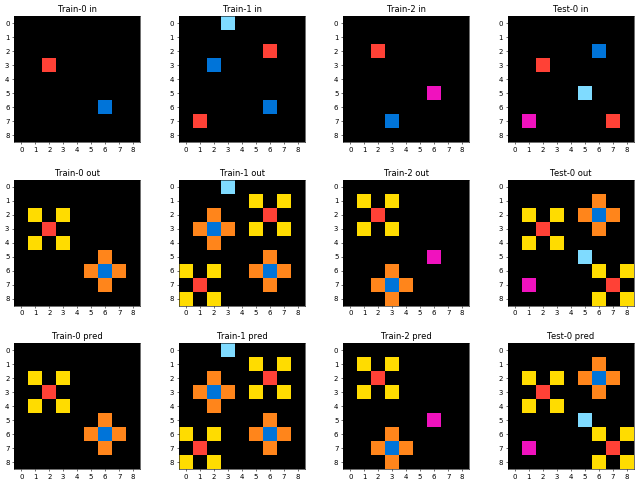

In [23]:
from itertools import product

def in_bounds(x,y,H,W):
    return 0 <= x < H and 0 <= y < W

def cross_neighbors(x,y,H,W):
    d = [0,0,1,-1]
    return [(x+dx,y+dy) for (dx, dy) in zip(d,d[::-1]) if in_bounds(x+dx, y+dy, H, W)]

def diag_neighbors(x,y,H,W):
    return [(x+dx,y+dy) for (dx, dy) in product([1,-1],[1,-1]) if in_bounds(x+dx, y+dy, H, W)]

def task_train014(x):
    def red_routine(x, y, grid):
        H, W = grid.shape
        for xx,yy in diag_neighbors(x,y,H,W):
            grid[xx,yy] = color2num["yellow"]
    
    def blue_routine(x, y, grid):
        H, W = grid.shape
        for xx,yy in cross_neighbors(x,y,H,W):
            grid[xx,yy] = color2num["orange"]
    
    H, W = x.shape
    y = x.copy()
    red, blue= color2num["red"], color2num["blue"]
    for xx in range(H):
        for yy in range(W):
            if y[xx,yy] == red:
                red_routine(xx,yy,y)
            if y[xx,yy] == blue:
                blue_routine(xx,yy,y)
    return y
      
task = get_data(str(training_path / training_tasks[14]))      
check(task, task_train014)

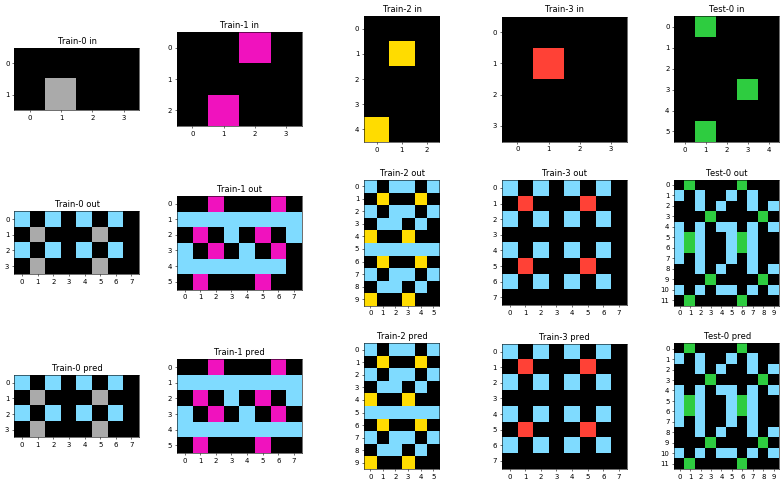

In [24]:
def task_train014(x):
    def color_routine(x,y,grid):
        H, W = grid.shape
        for xx,yy in diag_neighbors(x,y,H,W):
            if grid[xx,yy] != grid[x,y]:
                grid[xx,yy] = color2num["sky"]
        
    aux = np.tile(x, (2,2))
    y = aux.copy()
    H, W = aux.shape
    for xx in range(H):
        for yy in range(W):
            if aux[xx,yy] != color2num["black"]:
                color_routine(xx,yy,y)
    return y

task = get_data(str(training_path / training_tasks[18]))
check(task, task_train014)

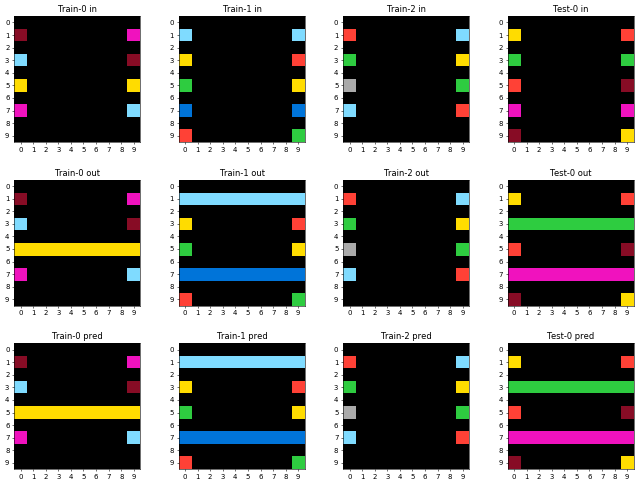

In [25]:
def task_train044(x):
    H, W = x.shape
    y = x.copy()
    for xx in range(H):
        if y[xx, 0] == y[xx, -1]:
            color = y[xx,0]
            y[xx] = np.array(color)
    return y

task = get_data(str(training_path / training_tasks[44]))
check(task, task_train044)

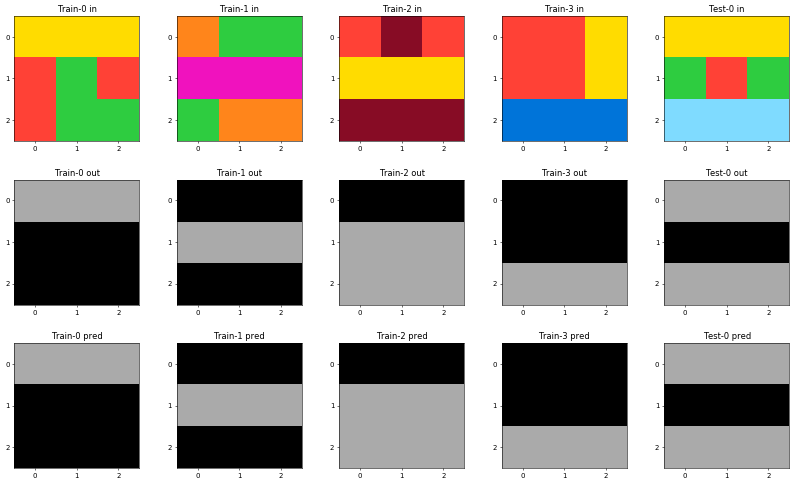

In [26]:
def task_train051(x):
    y = np.full(x.shape, color2num["black"])
    H, W = x.shape
    gray = color2num["gray"]
    for xx in range(H):
        if len(np.unique(x[xx])) == 1:
            y[xx] = gray
    return y
             
task = get_data(str(training_path / training_tasks[51]))
check(task, task_train051)

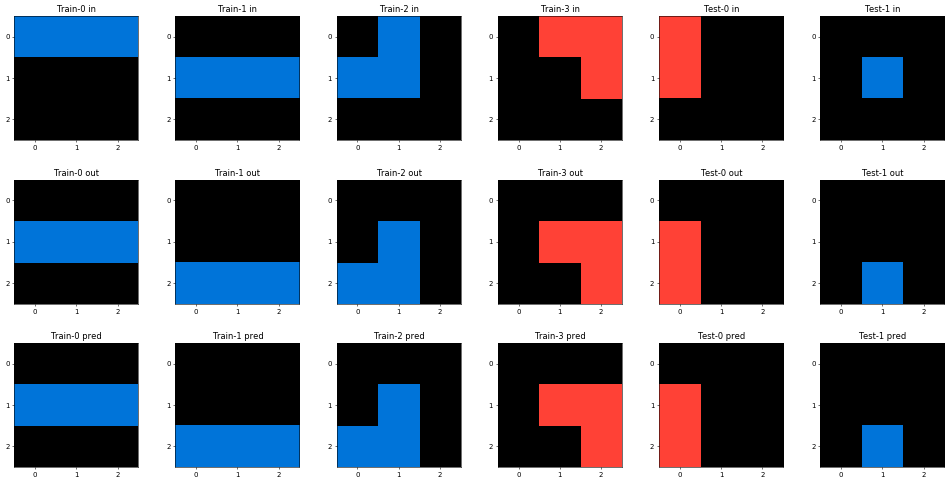

In [27]:
def task_train052(x):
    y = np.roll(x, 1, axis=0)
    return y

             
task = get_data(str(training_path / training_tasks[52]))
check(task, task_train052)
    

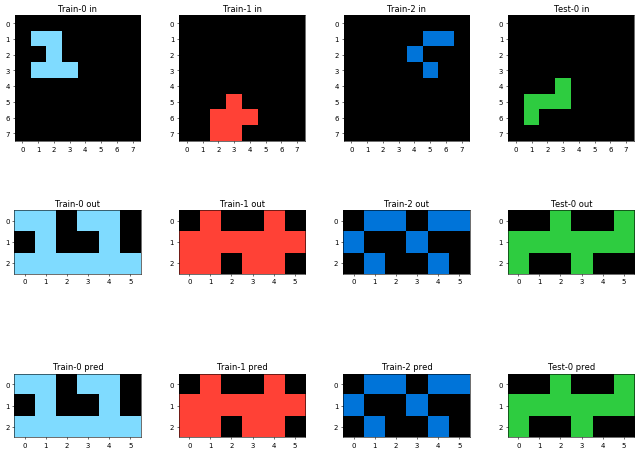

In [28]:
def crop_to_content(x):
    """ Crop an image to fit exactly the non 0 pixels """
    true_points = np.argwhere(x)
    if len(true_points) == 0:
        return []
    top_left = true_points.min(axis=0)
    bottom_right = true_points.max(axis=0)
    x = x[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]
    return [x]

def task_train056(x):
    y = x.copy()
    y = crop_to_content(y)
    return np.tile(y[0],(1,2))

task = get_data(str(training_path / training_tasks[56]))
check(task, task_train056)

In [114]:
# [np.array] -> bool
def same_shape(x):
    first_shape = x[0].shape
    for pixmap in x[1:]:
        if first_shape != pixmap.shape:
            return False
    return True

# np.array -> [np.array]
def splitH_unlifted(pixmap):
    """ Split horizontally an image """
    h = pixmap.shape[0]
    if h % 2 == 1:
        h = h // 2
        return [pixmap[:h,:], pixmap[h+1:,:]]
    else:
        h = h // 2
        return [pixmap[:h,:], pixmap[h:,:]]
    
# np.array -> [np.array]
def repaint_unlifted(pixmap):
    """ Repaint all painted pixels. Returns a list of pixmaps, each painted with different a color """
    pixmaps = []
    for color in range(1, len(color2num)):
        aux = pixmap.copy()
        aux[aux>0]=color
        pixmaps.append(aux)
    return pixmaps

# [np.array] -> [np.array]
def identity(x: [np.array]):
    return x

# [np.array] -> [np.array]
def tail(x):
    if len(x) > 1:
        return x[1:]
    else:
        return x

# [np.array] -> [np.array]
def init(x):
    if len(x) > 1:
        return x[:1]
    else:
        return x

# [np.array] -> [np.array]
def logical_xor(x):
    if len(x) < 2:
        return x
    if not same_shape(x):
        return []
    return [(np.logical_xor.reduce(np.array(x).astype(int)).astype(int))]

    

def show_image_list(images):
    """ Show each image contained in a list. """
    p = plt.figure().subplots(1, len(images))
    if len(images) > 1:
        for i, image in enumerate(images):
            p[i].imshow(image, cmap=cmap, norm=norm)
    elif len(images) == 1:
        p.imshow(images[0], cmap=cmap, norm=norm)


def lift(fct):
    """ Lift the function (see Monades) """
    def lifted_function(xs):
        list_of_results = [fct(x) for x in xs]
        return list(itertools.chain(*list_of_results))
    import re
    lifted_function.__name__ = re.sub('_unlifted$', '_lifted', fct.__name__)
    return lifted_function

splitH = lift(splitH_unlifted)
repaint = lift(repaint_unlifted)

task_file = str(training_path / training_tasks[235])
with open(task_file, 'r') as f:
    task = json.load(f)
input_image = np.array(task['train'][0]['input'])

def program_desc(program):
    """ Create a human readable description of a program. """
    desc = [x.__name__ for x in program]
    return' -> '.join(desc)

def evaluate(program: [], input_image: np.array):
    input_image = np.array(input_image)
    assert type(input_image) == np.ndarray
    
    image_list = [input_image]
    for fct in program:
        image_list = fct(image_list)
        image_list = [img for img in image_list if img.shape[0] > 0 and img.shape[1] > 0]
        if image_list == []:
            return []
    return image_list 

def are_two_images_equals(a, b):
    if tuple(a.shape) == tuple(b.shape):
        if (np.abs(b-a) < 1).all():
            return True
    return False

def is_solution(program, task):
    for sample in task:
        i = np.array(sample['input'])
        o = np.array(sample['output'])

        images = evaluate(program, i)
        if len(images) < 1: return False
        is_program_of_for_sample = any([are_two_images_equals(x, o) for x in images])
        if not is_program_of_for_sample: return False
    return True

program = [splitH, logical_xor, repaint]
print(program_desc(program),"is a solution of the task:", is_solution(program, task['train']))



# plot_task(get_data(str(training_path / training_tasks[i])))

splitH_lifted -> logical_xor -> repaint_lifted is a solution of the task: True


In [125]:
def width_fitness(predicted, expected_output):
    """ How close the predicted image is to have the right width. Less is better."""
    return np.abs(predicted.shape[0] - expected_output.shape[0])

def height_fitness(predicted, expected_output):
    """ How close the predicted image is to have the right height. Less is better."""
    return np.abs(predicted.shape[1] - expected_output.shape[1])

def activated_pixels_fitness(p, e):
    """ How close the predicted image to have the right pixels. Less is better."""
    shape = (max(p.shape[0], e.shape[0]), max(p.shape[1], e.shape[1]))
    diff = np.zeros(shape, dtype=int)
    diff[0:p.shape[0], 0:p.shape[1]] = (p > 0).astype(int)
    diff[0:e.shape[0], 0:e.shape[1]] -= (e > 0).astype(int)
    return (diff != 0).sum()

def colors_fitness(p, e):
    p_colors = np.unique(p)
    e_colors = np.unique(e)
    nb_inter = len(np.intersect1d(p_colors, e_colors))
    return (len(p_colors) - nb_inter) + (len(e_colors) - nb_inter)

fitness_functions = [colors_fitness, activated_pixels_fitness, height_fitness, width_fitness]

def product_less(a, b):
    """ Return True iff the two tuples a and b respect a<b for the partial order. """
    a = np.array(a)
    b = np.array(b)
    return (np.array(a) < np.array(b)).all()
    
# ([[np.array] -> [np.array]], Taks) -> (int, int, ..., int)
def evaluate_fitness(program, task):
    """ Take a program and a task, and return its fitness score as a tuple. """
    score = np.zeros((len(fitness_functions)))
    for sample in task:
        i = np.array(sample['input'])
        o = np.array(sample['output'])
        for index, fitness_function in enumerate(fitness_functions):
            images = evaluate(program, i)
            if not images: # Penalize no prediction!
                score[index] += 500
            else: 
                score[index] = min([fitness_function(image, o) for image in images])
    return tuple(score)

print("Fitness evaluation:", evaluate_fitness([splitH, logical_xor], task['train']))

def build_candidates(allowed_nodes=[identity], best_candidates=[], nb_candidates=200):
    """
    Create a poll of fresh candidates using the `allowed_nodes`.
    The pool contain a mix of new single instructions programs
    and mutations of the best candidates.
    """
    new_candidates = []
    program_length_limit = 4
    
    def random_node():
        return random.choice(allowed_nodes)
    
    while len(new_candidates) < nb_candidates:
        for i in range(5):
            new_candidates += [[random_node()]]
        
        for best_program in best_candidates:
            if len(best_program) < program_length_limit - 1:
                new_candidates += [[random_node()] + best_program]
            if len(best_program) < program_length_limit - 1:
                new_candidates += [best_program + [random_node()]]
            new_candidates += [list(best_program)]
            new_candidates[-1][random.randrange(0, len(best_program))] = random_node()
   
    return new_candidates

len(build_candidates(allowed_nodes=[identity], best_candidates=[[identity]], nb_candidates=42))

def build_model(task, max_iterations=100, verbose=True):
    candidates_nodes = [repaint, logical_xor, splitH]
    
    if verbose:
        print("Candidates nodes are:", [program_desc([n]) for n in candidates_nodes])
        print()

    best_candidates = {}
    for i in range(max_iterations):
        if verbose:
            print("Iteration ", i+1)
            print("-" * 10)
        
        candidates = build_candidates(candidates_nodes, best_candidates.values())
        
        for candidate in candidates:
            score = evaluate_fitness(candidate, task)
            is_incomparable = True
            
            best_candidates_items = list(best_candidates.items())
            for best_score, best_candidate in best_candidates_items:
                if product_less(score, best_score):
                    del best_candidates[best_score]
                    best_candidates[score] = candidate
                    is_incomparable = False 
                if product_less(best_score, score) or best_score == score:
                    is_incomparable = False 
            if is_incomparable:
                best_candidates[score] = candidate

        for program in best_candidates.values():
            if is_solution(program, task):
                return program
            
        if verbose:
            print("Best candidates lenght:", len(best_candidates))
            random_candidate_score = random.choice(list(best_candidates.keys()))
            print("Random candidate score:", random_candidate_score)
            print("Random candidate implementation:", program_desc(best_candidates[random_candidate_score]))
    return None

program = build_model(task['train'], verbose=True)

print()
if program is None:
    print("No program was found")
else:
    print("Found program:", program_desc(program))

Fitness evaluation: (2.0, 0.0, 0.0, 0.0)
Candidates nodes are: ['repaint_lifted', 'logical_xor', 'splitH_lifted']

Iteration  1
----------
Best candidates lenght: 3
Random candidate score: (2.0, 8.0, 0.0, 0.0)
Random candidate implementation: splitH_lifted
Iteration  2
----------
Best candidates lenght: 7
Random candidate score: (2.0, 8.0, 0.0, 0.0)
Random candidate implementation: splitH_lifted
Iteration  3
----------

Found program: splitH_lifted -> logical_xor -> repaint_lifted
